In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"]='/opt/anaconda/envs/bd9/bin/python'
os.environ["SPARK_HOME"]='/usr/hdp/current/spark2-client'
os.environ["PYSPARK_SUBMIT_ARGS"]='--num-executors 3 pyspark-shell'

spark_home = os.environ.get('SPARK_HOME', None)

sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.7-src.zip'))

In [2]:
# from pyspark import SparkContext, SparkConf

# conf = SparkConf()
# conf.set("spark.app.name", "natasha pritykovskaya Spark Dataframe app") 
# sc = SparkContext(conf=conf)

In [5]:
# from pyspark import SQLContext

# sqlContext = SQLContext(sc)

In [2]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf()
conf.set("spark.app.name", "natasha pritykovskaya Spark Dataframe app") 

spark = SparkSession.builder.config(conf=conf).appName("natasha pritykovskaya Spark Dataframe app").getOrCreate()

In [4]:
spark

Spark Session:

    - Spark Context
    - SQL Context
    - Hive Context
    - Streaming Context

In [5]:
sc = spark.sparkContext

In [6]:
sc

<SparkContext master=yarn appName=natasha pritykovskaya Spark Dataframe app>

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Как создать DataFrame?

### Прочитать из внешнего источника

In [8]:
spark.read

### pipeline загрузки
```python
spark.read\
     .format(...)\
     .option(key, value)\
     .option(key, value)\
     .load(path)
```

In [16]:
df = spark.read\
          .format("csv")\
          .option("sep", "|")\
          .load("/lectures/lecture02/data/ml-100k/u.user")

In [10]:
df

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string]

In [11]:
df.show(1)

+---+---+---+----------+-----+
|_c0|_c1|_c2|       _c3|  _c4|
+---+---+---+----------+-----+
|  1| 24|  M|technician|85711|
+---+---+---+----------+-----+
only showing top 1 row



In [12]:
df.take(5)

[Row(_c0='1', _c1='24', _c2='M', _c3='technician', _c4='85711'),
 Row(_c0='2', _c1='53', _c2='F', _c3='other', _c4='94043'),
 Row(_c0='3', _c1='23', _c2='M', _c3='writer', _c4='32067'),
 Row(_c0='4', _c1='24', _c2='M', _c3='technician', _c4='43537'),
 Row(_c0='5', _c1='33', _c2='F', _c3='other', _c4='15213')]

### Schema!

In [13]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [14]:
schema = StructType(fields=[
    StructField("user_id", IntegerType()),
    StructField("age", IntegerType()),
    StructField("gender", StringType()),
    StructField("occupation", StringType()),
    StructField("zip", IntegerType())
])

In [17]:
df = spark.read\
          .schema(schema)\
          .format("csv")\
          .option("sep", "|")\
          .load("/lectures/lecture02/data/ml-100k/u.user")

In [18]:
df

DataFrame[user_id: int, age: int, gender: string, occupation: string, zip: int]

In [19]:
df.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- zip: integer (nullable = true)



In [20]:
df.show(5)

+-------+---+------+----------+-----+
|user_id|age|gender|occupation|  zip|
+-------+---+------+----------+-----+
|      1| 24|     M|technician|85711|
|      2| 53|     F|     other|94043|
|      3| 23|     M|    writer|32067|
|      4| 24|     M|technician|43537|
|      5| 33|     F|     other|15213|
+-------+---+------+----------+-----+
only showing top 5 rows



In [21]:
df.summary().show()

+-------+-----------------+-----------------+------+-------------+------------------+
|summary|          user_id|              age|gender|   occupation|               zip|
+-------+-----------------+-----------------+------+-------------+------------------+
|  count|              925|              925|   925|          925|               925|
|   mean|470.2908108108108|34.06054054054054|  null|         null| 50868.78810810811|
| stddev|272.1030147185632|12.25807489536592|  null|         null|30891.373254138176|
|    min|                1|                7|     F|administrator|                 0|
|    25%|              236|               25|  null|         null|             21227|
|    50%|              469|               31|  null|         null|             53711|
|    75%|              705|               43|  null|         null|             78741|
|    max|              943|               73|     M|       writer|             99835|
+-------+-----------------+-----------------+------+--

### Таким образом более приближенный к реальности pipeline выглядит как
```python
spark.read\
     .schema(schema)\
     .format(...)\
     .option(key, value)\
     .option(key, value)\
     .load(path)
```

### Есть так же удобные wrapper'ы

In [22]:
df = spark.read.csv("/lectures/lecture02/data/ml-100k/u.user", schema=schema, sep="|")

In [23]:
df

DataFrame[user_id: int, age: int, gender: string, occupation: string, zip: int]

In [24]:
df.show(5)

+-------+---+------+----------+-----+
|user_id|age|gender|occupation|  zip|
+-------+---+------+----------+-----+
|      1| 24|     M|technician|85711|
|      2| 53|     F|     other|94043|
|      3| 23|     M|    writer|32067|
|      4| 24|     M|technician|43537|
|      5| 33|     F|     other|15213|
+-------+---+------+----------+-----+
only showing top 5 rows



### Много источников данных с унифицированным API!
+ CSV
+ JSON
+ Hive
+ HBase
+ Cassandra
+ MySQL
+ PostgreSQL
+ Parquet
+ ORC
+ Kafka
+ ElasticSearch
+ Amazon S3
+ ...и еще больше через custom connectors

### Создадим DataFrame из RDD, pandas.DataFrame или из list

In [25]:
rdd = sc.textFile("/lectures/lecture02/data/ml-100k/u.user").map(lambda x: x.split("|"))

In [26]:
rdd.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [27]:
df = spark.createDataFrame(rdd)

In [28]:
df

DataFrame[_1: string, _2: string, _3: string, _4: string, _5: string]

In [29]:
df = spark.createDataFrame(rdd, schema=schema)

In [30]:
df

DataFrame[user_id: int, age: int, gender: string, occupation: string, zip: int]

In [31]:
df.show(5)

Py4JJavaError: An error occurred while calling o193.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 10.0 failed 4 times, most recent failure: Lost task 0.3 in stage 10.0 (TID 13, spark-de-master-3.newprolab.com, executor 2): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/serializers.py", line 400, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/session.py", line 730, in prepare
    verify_func(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1389, in verify
    verify_value(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1370, in verify_struct
    verifier(v)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1389, in verify
    verify_value(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1315, in verify_integer
    verify_acceptable_types(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1278, in verify_acceptable_types
    % (dataType, obj, type(obj))))
TypeError: field user_id: IntegerType can not accept object '1' in type <class 'str'>

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1925)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1913)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1912)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1912)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:948)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:948)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:948)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2146)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2095)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2084)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:759)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:365)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3389)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:80)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:127)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:75)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2550)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2764)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:254)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:291)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/worker.py", line 377, in main
    process()
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/worker.py", line 372, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/serializers.py", line 400, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/hadoop/yarn/local/usercache/natalya.pritykovskaya/appcache/application_1613394706435_0160/container_e04_1613394706435_0160_01_000003/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/session.py", line 730, in prepare
    verify_func(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1389, in verify
    verify_value(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1370, in verify_struct
    verifier(v)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1389, in verify
    verify_value(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1315, in verify_integer
    verify_acceptable_types(obj)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/types.py", line 1278, in verify_acceptable_types
    % (dataType, obj, type(obj))))
TypeError: field user_id: IntegerType can not accept object '1' in type <class 'str'>

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:592)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:575)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:346)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:310)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


### Может быть с неправильными типами можно справится путем игнорирования верификации schema???

In [32]:
df = spark.createDataFrame(rdd, schema=schema, verifySchema=False)

In [33]:
df.show(5)

+-------+----+------+----------+----+
|user_id| age|gender|occupation| zip|
+-------+----+------+----------+----+
|   null|null|     M|technician|null|
|   null|null|     F|     other|null|
|   null|null|     M|    writer|null|
|   null|null|     M|technician|null|
|   null|null|     F|     other|null|
+-------+----+------+----------+----+
only showing top 5 rows



### Не выходит требуется конвертировать в правильные типы

In [34]:
rdd = rdd.map(lambda x: (int(x[0]), int(x[1]), x[2], x[3], int(x[4])))

In [35]:
df = spark.createDataFrame(rdd, schema=schema)

In [36]:
df.show(5)

+-------+---+------+----------+-----+
|user_id|age|gender|occupation|  zip|
+-------+---+------+----------+-----+
|      1| 24|     M|technician|85711|
|      2| 53|     F|     other|94043|
|      3| 23|     M|    writer|32067|
|      4| 24|     M|technician|43537|
|      5| 33|     F|     other|15213|
+-------+---+------+----------+-----+
only showing top 5 rows



## Поработаем с искусственным access логом

In [37]:
!hdfs dfs -tail /lectures/lecture02/data/logsM.txt

In [38]:
from pyspark.sql.types import LongType

log_schema = StructType(fields=[
    StructField("ip", StringType()),
    StructField("timestamp", LongType()),
    StructField("url", StringType()),
    StructField("size", IntegerType()),
    StructField("code", IntegerType()),
    StructField("ua", StringType())
])

In [39]:
log = spark.read.csv("/lectures/lecture02/data/logsM.txt", sep="\t", schema=log_schema).cache()

In [40]:
log

DataFrame[ip: string, timestamp: bigint, url: string, size: int, code: int, ua: string]

In [41]:
log.rdd.getNumPartitions()

1

In [42]:
log = log.repartition(4)

In [43]:
log.show(5, vertical=True, truncate=False)

-RECORD 0-------------------------------------------------------------------------------------------------------------------
 ip        | 49.105.15.79                                                                                                   
 timestamp | 20140127041332                                                                                                 
 url       | http://lenta.ru/5567208                                                                                        
 size      | 184                                                                                                            
 code      | 509                                                                                                            
 ua        | Chrome/5.0 compatible; MSIE 9.0; Windows NT 7.0; Trident/5.0; .NET CLR 2.2.50767;)                             
-RECORD 1-------------------------------------------------------------------------------------------------------------------


## Projections и filters
Projection - это подмножемтво колокнок

Filter - это подмножество строк

In [44]:
log.schema.fieldNames()

['ip', 'timestamp', 'url', 'size', 'code', 'ua']

In [45]:
log.select(["ip", "timestamp", "url"])

DataFrame[ip: string, timestamp: bigint, url: string]

In [46]:
log.select(*log.schema.fieldNames()[:3]).show(5)

+---------------+--------------+--------------------+
|             ip|     timestamp|                 url|
+---------------+--------------+--------------------+
| 197.72.248.141|20140313153714|http://lenta.ru/9...|
|  75.208.40.166|20140210083843|http://news.rambl...|
| 222.131.187.37|20140425170839|http://lenta.ru/2...|
|   49.203.96.67|20140225042119|http://news.yande...|
|135.124.143.193|20140313110843|http://news.mail....|
+---------------+--------------+--------------------+
only showing top 5 rows



In [47]:
log.select("ip", "code").show(5)

+---------------+----+
|             ip|code|
+---------------+----+
|   25.62.10.220| 306|
|   49.105.15.79| 101|
|   49.105.15.79| 101|
|135.124.143.193| 303|
|135.124.143.193| 303|
+---------------+----+
only showing top 5 rows



In [49]:
log.select(log.ip, log.code).show(5)

+---------------+----+
|             ip|code|
+---------------+----+
|   25.62.10.220| 306|
|   49.105.15.79| 101|
|   49.105.15.79| 101|
|135.124.143.193| 303|
|135.124.143.193| 303|
+---------------+----+
only showing top 5 rows



In [50]:
log.ip

Column<b'ip'>

## Aliasing

In [51]:
log.select(log.ip,
           log.code.alias("response")).show(5)

+---------------+--------+
|             ip|response|
+---------------+--------+
|   25.62.10.220|     306|
|   49.105.15.79|     101|
|   49.105.15.79|     101|
|135.124.143.193|     303|
|135.124.143.193|     303|
+---------------+--------+
only showing top 5 rows



In [52]:
import pyspark.sql.functions as f

In [53]:
log.select("ip", 
           f.col("code").alias("response")).show(5)

+---------------+--------+
|             ip|response|
+---------------+--------+
|   25.62.10.220|     306|
|   49.105.15.79|     101|
|   49.105.15.79|     101|
|135.124.143.193|     303|
|135.124.143.193|     303|
+---------------+--------+
only showing top 5 rows



## Good ol' Pandas

In [54]:
log[["ip", "code"]].show(5)

+---------------+----+
|             ip|code|
+---------------+----+
|   25.62.10.220| 306|
|   49.105.15.79| 101|
|   49.105.15.79| 101|
|135.124.143.193| 303|
|135.124.143.193| 303|
+---------------+----+
only showing top 5 rows



In [55]:
log[[log.ip, log.code.alias("response")]].show(5)

+---------------+--------+
|             ip|response|
+---------------+--------+
|   25.62.10.220|     306|
|   49.105.15.79|     101|
|   49.105.15.79|     101|
|135.124.143.193|     303|
|135.124.143.193|     303|
+---------------+--------+
only showing top 5 rows



## Filtering

In [58]:
log.where("code = 200").show(5)

+--------------+--------------+--------------------+----+----+--------------------+
|            ip|     timestamp|                 url|size|code|                  ua|
+--------------+--------------+--------------------+----+----+--------------------+
| 75.208.40.166|20140326084231|http://news.yande...| 955| 200|Opera/5.0 (Window...|
|197.72.248.141|20140404122749|http://newsru.com...| 884| 200|Opera/5.0 (compat...|
| 75.208.40.166|20140216075757|http://news.rambl...|1337| 200|Firefox/5.0 (comp...|
|168.255.93.197|20140213033139|http://news.yande...|1004| 200|Chrome/5.0 (Windo...|
|197.72.248.141|20140403130026|http://news.yande...| 856| 200|Opera/5.0 (compat...|
+--------------+--------------+--------------------+----+----+--------------------+
only showing top 5 rows



In [59]:
log.filter(log.code == 200).show(5, truncate=False)

+--------------+--------------+------------------------------+----+----+-----------------------------------------------------------------------------------------------------------------------------+
|ip            |timestamp     |url                           |size|code|ua                                                                                                                           |
+--------------+--------------+------------------------------+----+----+-----------------------------------------------------------------------------------------------------------------------------+
|75.208.40.166 |20140326084231|http://news.yandex.ru/2002966 |955 |200 |Opera/5.0 (Windows; U; MSIE 9.0; Windows NT 8.1; Trident/5.0; .NET4.0E; en-AU)                                               |
|197.72.248.141|20140404122749|http://newsru.com/7833710     |884 |200 |Opera/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; chromeframe/12.0.742.112)                               |
|75.2

In [60]:
log.filter("code == 200 AND url LIKE '%rambler%'").show(5, truncate=False, vertical=True)

-RECORD 0----------------------------------------------------------------------------------------------------------------------------------
 ip        | 33.49.147.163                                                                                                                 
 timestamp | 20140317090245                                                                                                                
 url       | http://news.rambler.ru/1667841                                                                                                
 size      | 166                                                                                                                           
 code      | 200                                                                                                                           
 ua        | Safari/5.0 (Windows; U; MSIE 9.0; Windows NT 6.0; Win64; x64; Trident/5.0; .NET CLR 3.8.50799; Media Center PC 6.0; .NET4.0E) 
-RECORD 1-----------

In [61]:
log.filter((log.code.isin([200, 404])) & (log.url.like("%rambler%"))).show(5)

+--------------+--------------+--------------------+----+----+--------------------+
|            ip|     timestamp|                 url|size|code|                  ua|
+--------------+--------------+--------------------+----+----+--------------------+
|222.131.187.37|20140219162554|http://news.rambl...| 119| 404|Chrome/5.0 (compa...|
|197.72.248.141|20140222074905|http://news.rambl...|1264| 200|Chrome/5.0 compat...|
| 33.49.147.163|20140109011807|http://news.rambl...|   4| 200|Safari/5.0 (compa...|
|197.72.248.141|20140421071734|http://news.rambl...|2032| 404|Safari/5.0 (compa...|
|197.72.248.141|20140210221913|http://news.rambl...|1654| 404|Safari/5.0 (Windo...|
+--------------+--------------+--------------------+----+----+--------------------+
only showing top 5 rows



## Good ol' Pandas

In [62]:
log[(log.code == 200) & (log.url.like("%rambler%"))].show(5)

+-------------+--------------+--------------------+----+----+--------------------+
|           ip|     timestamp|                 url|size|code|                  ua|
+-------------+--------------+--------------------+----+----+--------------------+
|33.49.147.163|20140317090245|http://news.rambl...| 166| 200|Safari/5.0 (Windo...|
|75.208.40.166|20140310132240|http://news.rambl...|1107| 200|Opera/5.0 (compat...|
|33.49.147.163|20140330043133|http://news.rambl...| 945| 200|Chrome/5.0 (compa...|
|33.49.147.163|20140329134621|http://news.rambl...|1593| 200|Firefox/5.0 (comp...|
|33.49.147.163|20140106045941|http://news.rambl...| 671| 200|Firefox/5.0 (comp...|
+-------------+--------------+--------------------+----+----+--------------------+
only showing top 5 rows



## Все вместе

In [63]:
log[(log.code == 200) & (log.url.like("%rambler%"))][["ip", "code"]].show(5)

+---------------+----+
|             ip|code|
+---------------+----+
| 197.72.248.141| 200|
|247.182.249.253| 200|
|  75.208.40.166| 200|
|  75.208.40.166| 200|
|   25.62.10.220| 200|
+---------------+----+
only showing top 5 rows



## Что же насчет SQL?! Он тут как тут)

In [64]:
query = """
SELECT ip, code FROM log_table 
WHERE code == 200 AND url LIKE '%rambler%'
"""

In [65]:
spark.sql(query).show(5)

AnalysisException: 'Table or view not found: log_table; line 2 pos 21'

### Надо зарегистрировать свой DataFrame как table

In [66]:
log.registerTempTable("log_table")

In [67]:
spark.sql(query).show(5)

+---------------+----+
|             ip|code|
+---------------+----+
| 197.72.248.141| 200|
|247.182.249.253| 200|
|  75.208.40.166| 200|
|  75.208.40.166| 200|
|   25.62.10.220| 200|
+---------------+----+
only showing top 5 rows



## Как Spark будет выполнять запрос?

In [106]:
spark.sql(query).explain(5)

== Parsed Logical Plan ==
'Project ['ip, 'code]
+- 'Filter (('code = 200) && 'url LIKE %rambler%)
   +- 'UnresolvedRelation `log_table`

== Analyzed Logical Plan ==
ip: string, code: int
Project [ip#572, code#576]
+- Filter ((code#576 = 200) && url#574 LIKE %rambler%)
   +- SubqueryAlias `log_table`
      +- Repartition 4, true
         +- Relation[ip#572,timestamp#573L,url#574,size#575,code#576,ua#577] csv

== Optimized Logical Plan ==
Repartition 4, true
+- Project [ip#572, code#576]
   +- Filter (((isnotnull(code#576) && isnotnull(url#574)) && (code#576 = 200)) && Contains(url#574, rambler))
      +- InMemoryRelation [ip#572, timestamp#573L, url#574, size#575, code#576, ua#577], StorageLevel(disk, memory, deserialized, 1 replicas)
            +- *(1) FileScan csv [ip#572,timestamp#573L,url#574,size#575,code#576,ua#577] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://bd-master.newprolab.com:8020/lectures/lecture02/data/logsM.txt], PartitionFilters: [], PushedFilters: 

## Функции есть 3 типа

+ mapping (one to one)
+ generating (one to many)
+ aggregating (many to one)

In [68]:
log.select("ua", f.length("ua")).show(5)

+--------------------+----------+
|                  ua|length(ua)|
+--------------------+----------+
|Safari/5.0 (compa...|        95|
|Safari/5.0 (compa...|        95|
|Safari/5.0 (compa...|        95|
|Safari/5.0 (compa...|        95|
|Safari/5.0 (compa...|        95|
+--------------------+----------+
only showing top 5 rows



In [69]:
log.select("ua", f.length("ua").alias("length")).show(5)

+--------------------+------+
|                  ua|length|
+--------------------+------+
|Safari/5.0 (compa...|    95|
|Safari/5.0 (compa...|    95|
|Safari/5.0 (compa...|    95|
|Safari/5.0 (compa...|    95|
|Safari/5.0 (compa...|    95|
+--------------------+------+
only showing top 5 rows



In [70]:
log.select(f.concat("url", "?utm_medium=email")).show(5)

AnalysisException: "cannot resolve '`?utm_medium=email`' given input columns: [code, url, timestamp, ua, ip, size];;\n'Project [concat(url#604, '?utm_medium=email) AS concat(url, ?utm_medium=email)#1552]\n+- Repartition 4, true\n   +- Relation[ip#602,timestamp#603L,url#604,size#605,code#606,ua#607] csv\n"

**`concat` необходим `Column` как аргумент. `lit` создает новую `Column` из literal**

In [71]:
log.select(f.concat("url", f.lit("?utm_medium=email")).alias("newurl")).show(5, False)

+-----------------------------------------------+
|newurl                                         |
+-----------------------------------------------+
|http://newsru.com/4608402?utm_medium=email     |
|http://news.yandex.ru/4761980?utm_medium=email |
|http://lenta.ru/2662415?utm_medium=email       |
|http://news.mail.ru/5550951?utm_medium=email   |
|http://news.rambler.ru/2396720?utm_medium=email|
+-----------------------------------------------+
only showing top 5 rows



## Explosions!

In [72]:
log.select("ua", f.split("ua", " ").alias("word_list")).show(5, False, True)

-RECORD 0---------------------------------------------------------------------------------------------------------------
 ua        | Safari/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; chromeframe/12.0.742.112)            
 word_list | [Safari/5.0, (compatible;, MSIE, 9.0;, Windows, NT, 6.1;, WOW64;, Trident/5.0;, chromeframe/12.0.742.112)] 
-RECORD 1---------------------------------------------------------------------------------------------------------------
 ua        | Safari/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; chromeframe/12.0.742.112)            
 word_list | [Safari/5.0, (compatible;, MSIE, 9.0;, Windows, NT, 6.1;, WOW64;, Trident/5.0;, chromeframe/12.0.742.112)] 
-RECORD 2---------------------------------------------------------------------------------------------------------------
 ua        | Safari/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; chromeframe/12.0.742.112)            
 word_list | [Safari/5.0, (compa

**Можно выбирать отдельные элементы из list!**

In [73]:
log.select("ua", f.split("ua", " ").alias("word_list"))\
   .select(f.col("word_list")[0], f.col("word_list")[1])\
   .show(5)

+------------+------------+
|word_list[0]|word_list[1]|
+------------+------------+
|  Safari/5.0|(compatible;|
|  Safari/5.0|(compatible;|
|  Safari/5.0|(compatible;|
|  Safari/5.0|(compatible;|
|  Safari/5.0|(compatible;|
+------------+------------+
only showing top 5 rows



In [74]:
log.select("ua", f.split("ua", " ").alias("word_list"))\
   .select(f.explode("word_list").alias("word"))\
   .groupby("word").count()\
   .orderBy("count", ascending=False)\
   .show(5)

+------------+-----+
|        word|count|
+------------+-----+
|        MSIE|10092|
|        9.0;|10092|
|          NT|10092|
|     Windows|10092|
|Trident/5.0;| 9121|
+------------+-----+
only showing top 5 rows



## Joins

In [75]:
!hdfs dfs -tail /lectures/lecture02/data/ipDataM.txt

96.67	Khanty–Mansi
197.72.248.141	Chechnya
33.49.147.163	Nizhny Novgorod Oblast
56.167.169.126	Voronezh Oblast
3.183.113.77	Astrakhan Oblast
56.167.169.126	Tver Oblast
56.167.169.126	Kabardino-Balkaria
56.167.169.126	Nenets Autonomous Okrug
33.49.147.163	Omsk Oblast
14.8.59.211	Khabarovsk Krai
75.208.40.166	Sakha
135.124.143.193	Samara Oblast
75.208.40.166	Novosibirsk Oblast
75.208.40.166	Amur Oblast
75.208.40.166	Karelia
75.208.40.166	Saint Petersburg
181.217.177.35	Samara Oblast
33.49.147.163	Irkutsk Oblast
56.167.169.126	Lipetsk Oblast
181.217.177.35	Kalmykia
168.255.93.197	Volgograd Oblast
168.255.93.197	Oryol Oblast
168.255.93.197	Kurgan Oblast
168.146.187.80	Primorsky Krai
49.105.15.79	North Ossetia–Alania
197.72.248.141	Stavropol Krai
14.8.59.211	Kemerovo Oblast
49.203.96.67	Ulyanovsk Oblast
222.131.187.37	Yamalo-Nenets
197.72.248.141	Zabaykalsky Krai
222.131.187.37	Kaluga Oblast
3.183.113.77	Saratov Oblast
168.255.93.197	Astrakhan Oblast
75.208.40.166	Novgorod Oblast
135.124.14

In [76]:
ip_schema = StructType(fields=[
    StructField("ip", StringType()),
    StructField("region", StringType())
])

In [77]:
ips = spark.read.csv("/lectures/lecture02/data/ipDataM.txt", schema=ip_schema, sep="\t").cache()

In [78]:
ips.show(5)

+--------------+------------------+
|            ip|            region|
+--------------+------------------+
|  49.105.15.79|              Komi|
|110.91.102.196|Chelyabinsk Oblast|
|56.167.169.126|  Saint Petersburg|
| 75.208.40.166|  Ulyanovsk Oblast|
|168.255.93.197|    Irkutsk Oblast|
+--------------+------------------+
only showing top 5 rows



## Есть трюк, который отключает автоматические broadcast'ы для joins. 

In [79]:
spark.sql("SET spark.sql.autoBroadcastJoinThreshold = 100500")

DataFrame[key: string, value: string]

In [80]:
log_with_regions = log.join(ips, on="ip", how="inner")

In [81]:
log_with_regions

DataFrame[ip: string, timestamp: bigint, url: string, size: int, code: int, ua: string, region: string]

In [82]:
log_with_regions.show(5)

+------------+--------------+--------------------+----+----+--------------------+-------------------+
|          ip|     timestamp|                 url|size|code|                  ua|             region|
+------------+--------------+--------------------+----+----+--------------------+-------------------+
|3.183.113.77|20140416052008|http://news.rambl...| 363| 404|Safari/5.0 (Windo...|           Chukotka|
|3.183.113.77|20140416052008|http://news.rambl...| 363| 404|Safari/5.0 (Windo...|     Ivanovo Oblast|
|3.183.113.77|20140416052008|http://news.rambl...| 363| 404|Safari/5.0 (Windo...|          Tatarstan|
|3.183.113.77|20140416052008|http://news.rambl...| 363| 404|Safari/5.0 (Windo...|Karachay–Cherkessia|
|3.183.113.77|20140416052008|http://news.rambl...| 363| 404|Safari/5.0 (Windo...|   Yaroslavl Oblast|
+------------+--------------+--------------------+----+----+--------------------+-------------------+
only showing top 5 rows



In [83]:
log_with_regions.rdd.getNumPartitions()

200

In [84]:
spark.conf.get("spark.sql.shuffle.partitions")

'200'

In [85]:
log_with_regions = log_with_regions.coalesce(4).cache()

## Query planner использует SortMergeJoin по дефолту

In [86]:
log_with_regions.explain(extended=True)

== Parsed Logical Plan ==
Repartition 4, false
+- Project [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724]
   +- Join Inner, (ip#602 = ip#1723)
      :- Repartition 4, true
      :  +- Relation[ip#602,timestamp#603L,url#604,size#605,code#606,ua#607] csv
      +- Relation[ip#1723,region#1724] csv

== Analyzed Logical Plan ==
ip: string, timestamp: bigint, url: string, size: int, code: int, ua: string, region: string
Repartition 4, false
+- Project [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724]
   +- Join Inner, (ip#602 = ip#1723)
      :- Repartition 4, true
      :  +- Relation[ip#602,timestamp#603L,url#604,size#605,code#606,ua#607] csv
      +- Relation[ip#1723,region#1724] csv

== Optimized Logical Plan ==
InMemoryRelation [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724], StorageLevel(disk, memory, deserialized, 1 replicas)
   +- Coalesce 4
      +- *(5) Project [ip#602, timestamp#603L, url#604, size#605,

## Broadcast hint

In [87]:
log_with_regions = log.join(f.broadcast(ips), on="ip", how="inner")

In [88]:
log_with_regions.explain()

== Physical Plan ==
*(3) Project [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724]
+- *(3) BroadcastHashJoin [ip#602], [ip#1723], Inner, BuildRight
   :- Exchange RoundRobinPartitioning(4)
   :  +- *(1) Filter isnotnull(ip#602)
   :     +- InMemoryTableScan [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607], [isnotnull(ip#602)]
   :           +- InMemoryRelation [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607], StorageLevel(disk, memory, deserialized, 1 replicas)
   :                 +- *(1) FileScan csv [ip#602,timestamp#603L,url#604,size#605,code#606,ua#607] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://spark-de-master-1.newprolab.com:8020/lectures/lecture02/data/logsM.txt], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<ip:string,timestamp:bigint,url:string,size:int,code:int,ua:string>
   +- BroadcastExchange HashedRelationBroadcastMode(List(input[0, string, false]))
      +- *(2) Filter isnotnull(ip#172

## Или можно использовать метод `hint()`

In [89]:
log_with_regions = log.join(ips.hint("broadcast"), on="ip", how="inner").cache()

In [90]:
log_with_regions.explain(True)

== Parsed Logical Plan ==
'Join UsingJoin(Inner,Buffer(ip))
:- Repartition 4, true
:  +- Relation[ip#602,timestamp#603L,url#604,size#605,code#606,ua#607] csv
+- ResolvedHint (broadcast)
   +- Relation[ip#1723,region#1724] csv

== Analyzed Logical Plan ==
ip: string, timestamp: bigint, url: string, size: int, code: int, ua: string, region: string
Project [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724]
+- Join Inner, (ip#602 = ip#1723)
   :- Repartition 4, true
   :  +- Relation[ip#602,timestamp#603L,url#604,size#605,code#606,ua#607] csv
   +- ResolvedHint (broadcast)
      +- Relation[ip#1723,region#1724] csv

== Optimized Logical Plan ==
InMemoryRelation [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724], StorageLevel(disk, memory, deserialized, 1 replicas)
   +- *(3) Project [ip#602, timestamp#603L, url#604, size#605, code#606, ua#607, region#1724]
      +- *(3) BroadcastHashJoin [ip#602], [ip#1723], Inner, BuildRight
         :- Exch

## Aggregations

## Aggregation pipeline выглядит следующим образом:
```python
df.groupBy(*cols)\
  .agg(*expressions)
```

In [91]:
log_with_regions.groupBy("region")\
                .agg(f.count("ip").alias("count"))\
                .orderBy("count", ascending=False)\
                .show(10)

+------------------+------+
|            region| count|
+------------------+------+
|  Ulyanovsk Oblast|204275|
|            Jewish|134523|
|  Saint Petersburg|129362|
|Arkhangelsk Oblast|124937|
|    Vologda Oblast|122363|
|   Novgorod Oblast|122306|
|     Moscow Oblast|120336|
|  Krasnoyarsk Krai|119285|
|              Komi|117659|
|          Kalmykia|117172|
+------------------+------+
only showing top 10 rows



In [92]:
log_with_regions.groupBy("region")\
                .count()\
                .withColumnRenamed("count", "row_count")\
                .orderBy("row_count", ascending=False)\
                .show(10)

+------------------+---------+
|            region|row_count|
+------------------+---------+
|  Ulyanovsk Oblast|   204275|
|            Jewish|   134523|
|  Saint Petersburg|   129362|
|Arkhangelsk Oblast|   124937|
|    Vologda Oblast|   122363|
|   Novgorod Oblast|   122306|
|     Moscow Oblast|   120336|
|  Krasnoyarsk Krai|   119285|
|              Komi|   117659|
|          Kalmykia|   117172|
+------------------+---------+
only showing top 10 rows



In [93]:
length_stat = log_with_regions.groupBy(f.length("url").alias("url_length"))\
                              .agg(f.count("*").alias("row_count"))\
                              .orderBy("row_count", ascending=False)\
                              .toPandas()

In [94]:
length_stat

,url_length,row_count
0,23,1676363
1,27,1644000
2,25,1639043
3,29,1638174
4,30,1617023


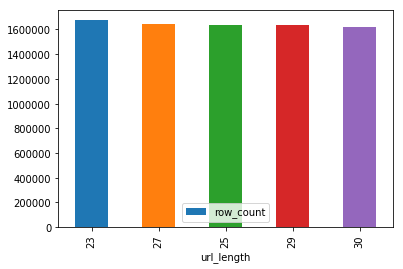

In [95]:
length_stat.plot(kind="bar", x="url_length", y="row_count")

In [96]:
log_with_domains = log_with_regions.withColumn("domain", f.regexp_extract("url", "http:\/\/(.*)\/", 1))

In [97]:
log_with_domains.show(5, False, True)

-RECORD 0---------------------------------------------------------------------------------------
 ip        | 49.105.15.79                                                                       
 timestamp | 20140127041332                                                                     
 url       | http://lenta.ru/5567208                                                            
 size      | 184                                                                                
 code      | 509                                                                                
 ua        | Chrome/5.0 compatible; MSIE 9.0; Windows NT 7.0; Trident/5.0; .NET CLR 2.2.50767;) 
 region    | North Ossetia–Alania                                                               
 domain    | lenta.ru                                                                           
-RECORD 1---------------------------------------------------------------------------------------
 ip        | 49.105.15.79     

## Есть ли корреляция между `url_length` и `domain`?

In [98]:
length_stat = log_with_domains.groupBy(f.length("url").alias("url_length"), "domain")\
                              .agg(f.count("*").alias("row_count"))\
                              .orderBy("row_count", ascending=False)\
                              .toPandas()

In [99]:
length_stat

,url_length,domain,row_count
0,23,lenta.ru,1676363
1,27,news.mail.ru,1644000
2,25,newsru.com,1639043
3,29,news.yandex.ru,1638174
4,30,news.rambler.ru,1617023


In [100]:
log_with_domains[log_with_domains.domain == "lenta.ru"][["url"]].show(5, False)

+-----------------------+
|url                    |
+-----------------------+
|http://lenta.ru/5567208|
|http://lenta.ru/5567208|
|http://lenta.ru/5567208|
|http://lenta.ru/5567208|
|http://lenta.ru/5567208|
+-----------------------+
only showing top 5 rows



In [101]:
log_with_domains.withColumn("url_length", f.length("url")).corr("domain", "url_length")

IllegalArgumentException: 'requirement failed: Currently correlation calculation for columns with dataType string not supported.'

## User Defined Functions
UDF может иметь один из следующих типов:
+ **SCALAR**. scalar UDF задает transformation: Одну или несколько `pandas.Series` -> `pandas.Series`. Scalar UDFs используются с `pyspark.sql.DataFrame.withColumn()` и `pyspark.sql.DataFrame.select()`
+ **GROUPED_MAP**.grouped map UDF задает transformation: A `pandas.DataFrame` -> A `pandas.DataFrame`. Grouped map UDFs используются с `pyspark.sql.GroupedData.apply()`

In [102]:
log_with_domains[["domain"]].distinct().collect()

[Row(domain='news.rambler.ru'),
 Row(domain='news.yandex.ru'),
 Row(domain='newsru.com'),
 Row(domain='news.mail.ru'),
 Row(domain='lenta.ru')]

In [103]:
@f.pandas_udf(IntegerType())
def encode_domain(domains):
    mapping = {
        'lenta.ru': 0,
        'newsru.com': 1,
        'news.mail.ru': 2,
        'news.yandex.ru': 3,
        'news.rambler.ru': 4
    }
    return domains.apply(lambda x: mapping.get(x))

In [104]:
log_with_domains.withColumn("domain_encoded", encode_domain("domain")).show(5, vertical=True, truncate=False)

-RECORD 0--------------------------------------------------------------------------------------------
 ip             | 49.105.15.79                                                                       
 timestamp      | 20140127041332                                                                     
 url            | http://lenta.ru/5567208                                                            
 size           | 184                                                                                
 code           | 509                                                                                
 ua             | Chrome/5.0 compatible; MSIE 9.0; Windows NT 7.0; Trident/5.0; .NET CLR 2.2.50767;) 
 region         | North Ossetia–Alania                                                               
 domain         | lenta.ru                                                                           
 domain_encoded | 0                                                               

In [103]:
log_with_domains.withColumn("domain_encoded", encode_domain("domain"))\
                .withColumn("url_length", f.length("url"))\
                .corr("domain_encoded", "url_length")

0.9939371499379468

In [104]:
log_with_domains.filter(f.isnull("url")).count()

0

In [105]:
log_with_domains.groupby("domain").agg(f.min(f.length("url")), f.max(f.length("url"))).show()

+---------------+----------------+----------------+
|         domain|min(length(url))|max(length(url))|
+---------------+----------------+----------------+
|news.rambler.ru|              30|              30|
| news.yandex.ru|              29|              29|
|     newsru.com|              25|              25|
|   news.mail.ru|              27|              27|
|       lenta.ru|              23|              23|
+---------------+----------------+----------------+



In [ ]:
spark.stop()